In [1]:
import pandas as pd
from google.cloud import bigquery
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import joblib

print('Successfully imported packages')

Successfully imported packages


In [2]:
# Set up BigQuery client
client = bigquery.Client()

# Import and inspect the data

In [3]:
# Define a query to load the data
query = """
SELECT *
FROM ultra-path-428923-i6.london_bikes.london_bikes
LIMIT 10000
"""

In [4]:
# Execute the query and load data into a pandas DataFrame
df = client.query(query).to_dataframe()

/opt/conda/lib/python3.10/site-packages/google/cloud/bigquery/table.py:2309: UserWarning: Unable to represent RANGE schema as struct using pandas ArrowDtype. Using `object` instead. To use ArrowDtype, use pandas >= 1.5 and pyarrow >= 10.0.1.
  warnings.warn(_RANGE_PYARROW_WARNING)
/opt/conda/lib/python3.10/site-packages/google/cloud/bigquery/table.py:2323: UserWarning: Unable to represent RANGE schema as struct using pandas ArrowDtype. Using `object` instead. To use ArrowDtype, use pandas >= 1.5 and pyarrow >= 10.0.1.
  warnings.warn(_RANGE_PYARROW_WARNING)
/opt/conda/lib/python3.10/site-packages/google/cloud/bigquery/table.py:2337: UserWarning: Unable to represent RANGE schema as struct using pandas ArrowDtype. Using `object` instead. To use ArrowDtype, use pandas >= 1.5 and pyarrow >= 10.0.1.
  warnings.warn(_RANGE_PYARROW_WARNING)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   timestamp     10000 non-null  datetime64[ns, UTC]
 1   cnt           10000 non-null  Int64              
 2   t1            10000 non-null  float64            
 3   t2            10000 non-null  float64            
 4   hum           10000 non-null  float64            
 5   wind_speed    10000 non-null  float64            
 6   weather_code  10000 non-null  float64            
 7   is_holiday    10000 non-null  float64            
 8   is_weekend    10000 non-null  float64            
 9   season        10000 non-null  float64            
dtypes: Int64(1), datetime64[ns, UTC](1), float64(8)
memory usage: 791.1 KB


### Dataframe explanation
**timestamp:** timestamp field for grouping the data (Datetime) <br>
**cnt:** Count of new bike shares (int) <br>
**t1:** Real Temperature (ºC) <br>
**t2:** Feels like Temperature (ºC) <br>
**hum:** Humidity (%) <br>
**wind_speed:** Wind Speed (km/h) <br>
**weather_code:** Weather Status* <br>
**is_holiday:** Whether the date is (1) or isn't (0) a holiday <br>
**is_weekend:** Whether the date is (1) or isn't (0) a weekend <br>
**season:** The current season either Spring(0), Summer(1), Fall(2), Winter(3)

<b>*Weather Codes: </b><br>
1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity <br>
2 = scattered clouds / few clouds <br>
3 = Broken clouds <br>
4 = Cloudy <br>
7 = Rain/ light Rain shower/ Light rain <br>
10 = rain with thunderstorm <br>
26 = snowfall <br>
94 = Freezing Fog <br>

In [6]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-19 22:00:00+00:00,356,2.0,1.0,75.0,3.0,2.0,0.0,0.0,3.0
1,2015-01-22 01:00:00+00:00,81,2.0,2.0,87.0,2.0,2.0,0.0,0.0,3.0
2,2015-01-22 19:00:00+00:00,1350,2.0,0.0,70.0,6.5,2.0,0.0,0.0,3.0
3,2015-02-05 01:00:00+00:00,84,2.0,-1.5,87.0,13.0,2.0,0.0,0.0,3.0
4,2015-02-05 19:00:00+00:00,1316,2.0,-2.0,75.0,16.0,2.0,0.0,0.0,3.0


In [7]:
df.set_index('timestamp', inplace=True)

## Visualise the data

#### Moving 7-day Average of Bike Count

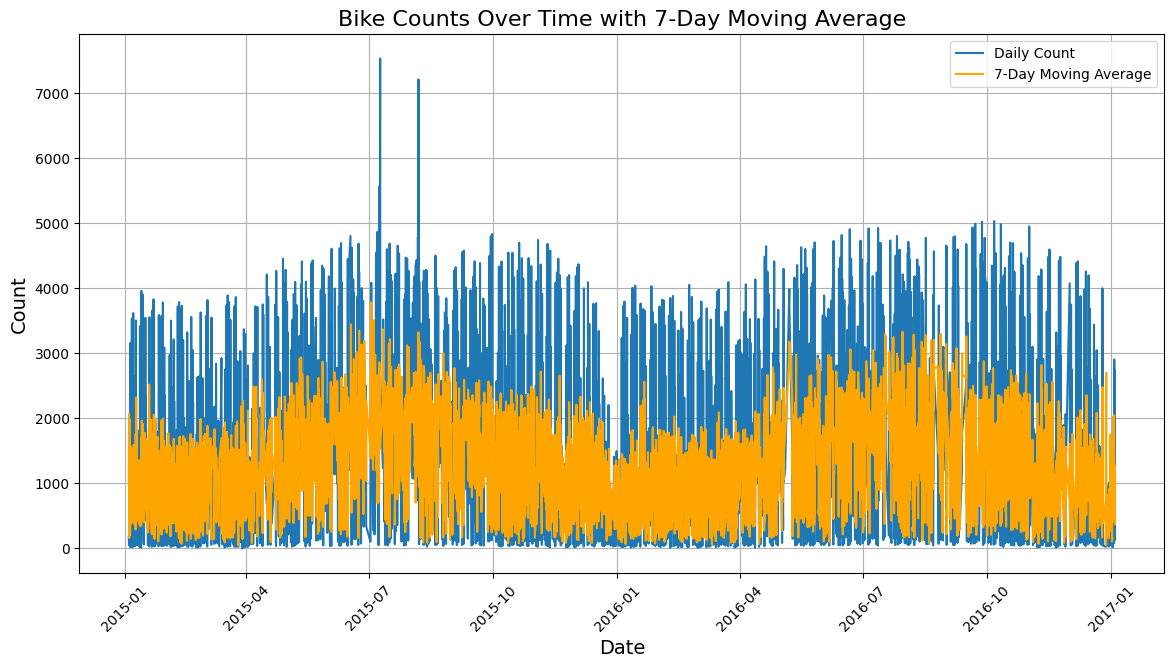

In [8]:
# Calculate the 7-day moving average
df['7_day_avg'] = df['cnt'].rolling(window=7).mean()

# Plot the original data and the 7-day moving average
fig, ax = plt.subplots(figsize=(14, 7))
sns.lineplot(data=df, x=df.index, y='cnt', ax=ax, label='Daily Count')
sns.lineplot(data=df, x=df.index, y='7_day_avg', ax=ax, label='7-Day Moving Average', color='orange')

# Set the title and labels
ax.set_title('Bike Counts Over Time with 7-Day Moving Average', fontsize=16)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid lines for better readability
ax.grid(True)

# Show the plot
plt.show()


#### Bike Counts per Month

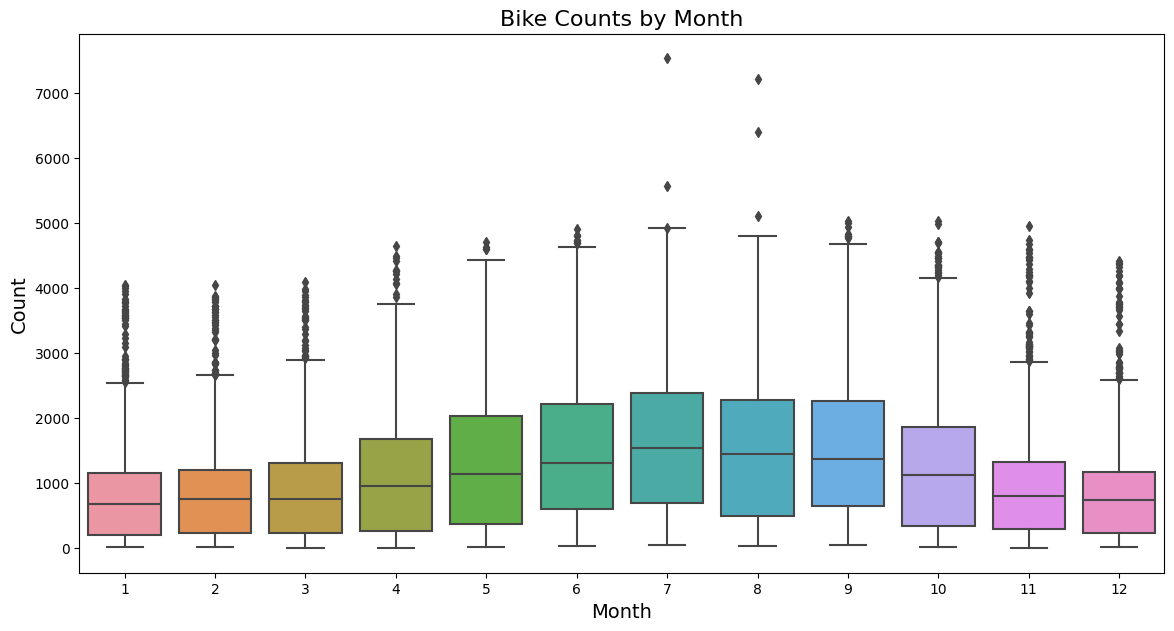

In [9]:
# Add a month column for boxplot
df['month'] = df.index.month

# Plot the boxplot
fig, ax = plt.subplots(figsize=(14, 7))
sns.boxplot(x='month', y='cnt', data=df, ax=ax)

# Set the title and labels
ax.set_title('Bike Counts by Month', fontsize=16)
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# Show the plot
plt.show()


In [16]:
# Send the data back to BigQuery
df.to_gbq(destination_table='ultra-path-428923-i6.london_bikes.cleaned_bike_sharing_data', if_exists='replace')
print("Successfully sent data back to BigQuery")

100%|██████████| 1/1 [00:00<00:00, 8355.19it/s]

Successfully sent data back to BigQuery
